# [Data - Timeseries Analysis]

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

# Question 1

In [2]:
# load Electricity data

df = pd.read_excel("electricity_data.xlsx")

In [3]:
df.head()

,Date,Hour,Weekday,Is Working Day,SDSH Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
0,2020-01-08 00:00:00,1,4,7,2475.68,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524
1,2020-01-08 01:00:00,2,4,7,2484.40,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393
2,2020-01-08 02:00:00,3,4,7,2486.89,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833
3,2020-01-08 03:00:00,4,4,7,2533.42,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119
4,2020-01-08 04:00:00,5,4,7,2850.75,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119


In [4]:
df.shape

(7584, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7584 non-null   datetime64[ns]
 1   Hour            7584 non-null   int64         
 2   Weekday         7584 non-null   int64         
 3   Is Working Day  7584 non-null   int64         
 4   SDSH Price      7584 non-null   float64       
 5   SDSH DAP        7584 non-null   float64       
 6   SDSH Volume     7584 non-null   float64       
 7   Sgn0 VolumeDir  7584 non-null   float64       
 8   P24HA Price     7584 non-null   float64       
 9   PDSH Price      7584 non-null   float64       
 10  PWSH Price      7584 non-null   float64       
 11  PWA Price       7584 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 711.1 KB


In [6]:
df.describe()

,Hour,Weekday,Is Working Day,SDSH Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,12.500000,4.000000,4.572785,2429.366103,2327.516847,1587.817563,0.017128,2433.184528,2426.827399,2464.853534,2442.328138
std,6.922643,1.996965,1.390982,1590.750740,1419.109180,213.112880,73.092988,1125.325853,1564.734896,1605.184755,870.873043
min,1.000000,1.000000,1.000000,124.160000,87.380000,1079.800000,-465.200000,1145.512917,124.160000,124.160000,1409.440833
25%,6.750000,2.000000,4.000000,1664.347500,1651.850000,1400.975000,-50.425000,1722.828854,1666.838500,1676.697500,1813.919442
50%,12.500000,4.000000,5.000000,1945.700000,1922.320000,1583.300000,-16.200000,2029.105417,1951.465000,1967.165000,2060.332396
75%,18.250000,6.000000,5.000000,2568.547500,2507.287500,1757.625000,43.300000,2725.680729,2595.940000,2603.567500,2823.226385
max,24.000000,7.000000,8.000000,10117.855409,9548.439791,2192.300000,661.200000,7691.478347,10117.855409,10117.855409,5520.089733


In [7]:
df.isnull().sum()

Date              0
Hour              0
Weekday           0
Is Working Day    0
SDSH Price        0
SDSH DAP          0
SDSH Volume       0
Sgn0 VolumeDir    0
P24HA Price       0
PDSH Price        0
PWSH Price        0
PWA Price         0
dtype: int64

In [8]:
df.dtypes

Date              datetime64[ns]
Hour                       int64
Weekday                    int64
Is Working Day             int64
SDSH Price               float64
SDSH DAP                 float64
SDSH Volume              float64
Sgn0 VolumeDir           float64
P24HA Price              float64
PDSH Price               float64
PWSH Price               float64
PWA Price                float64
dtype: object

In [9]:
# create new colum year,month,day from Date colum

df['year']=df.Date.dt.year
df['month']=df.Date.dt.month
df['day']=df.Date.dt.day



In [10]:
df.drop(["Date"], axis=1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hour            7584 non-null   int64  
 1   Weekday         7584 non-null   int64  
 2   Is Working Day  7584 non-null   int64  
 3   SDSH Price      7584 non-null   float64
 4   SDSH DAP        7584 non-null   float64
 5   SDSH Volume     7584 non-null   float64
 6   Sgn0 VolumeDir  7584 non-null   float64
 7   P24HA Price     7584 non-null   float64
 8   PDSH Price      7584 non-null   float64
 9   PWSH Price      7584 non-null   float64
 10  PWA Price       7584 non-null   float64
 11  year            7584 non-null   int64  
 12  month           7584 non-null   int64  
 13  day             7584 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 829.6 KB


# data visualization

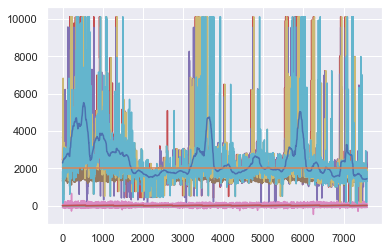

In [12]:
plt.plot(df)

array([[<AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Weekday'}>,
        <AxesSubplot:title={'center':'Is Working Day'}>,
        <AxesSubplot:title={'center':'SDSH Price'}>],
       [<AxesSubplot:title={'center':'SDSH DAP'}>,
        <AxesSubplot:title={'center':'SDSH Volume'}>,
        <AxesSubplot:title={'center':'Sgn0 VolumeDir'}>,
        <AxesSubplot:title={'center':'P24HA Price'}>],
       [<AxesSubplot:title={'center':'PDSH Price'}>,
        <AxesSubplot:title={'center':'PWSH Price'}>,
        <AxesSubplot:title={'center':'PWA Price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

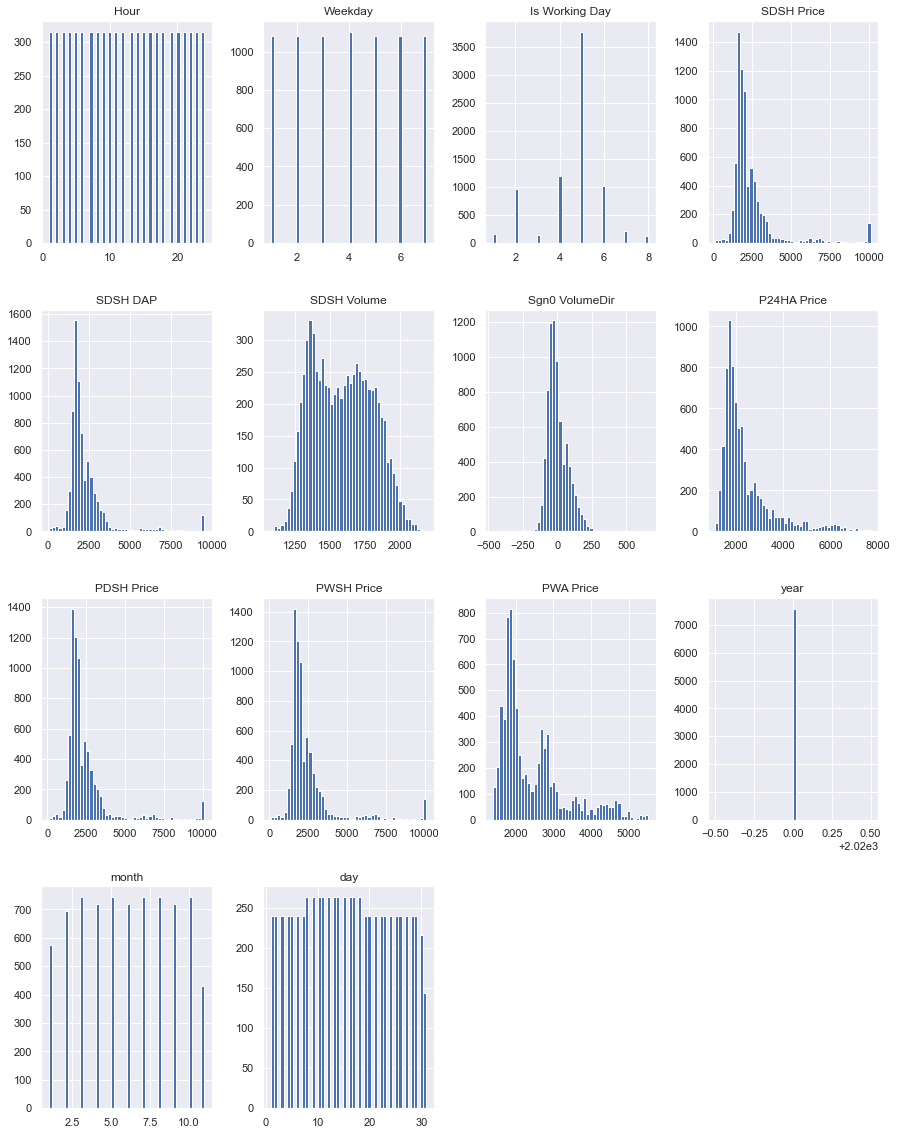

In [13]:
#using matplotlib drawing the histogram

df.hist(bins=50, figsize=(15,20))

c:\users\barma\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='SDSH Price'>

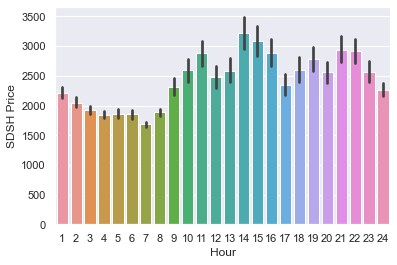

In [14]:
# bar plot
sns.barplot(df['Hour'],df['SDSH Price'])

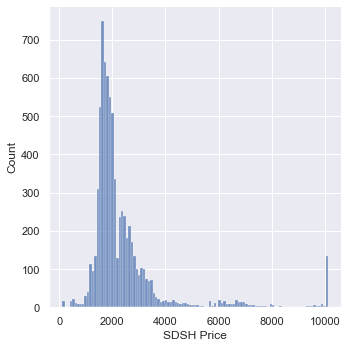

In [15]:
sns.displot(df['SDSH Price'])

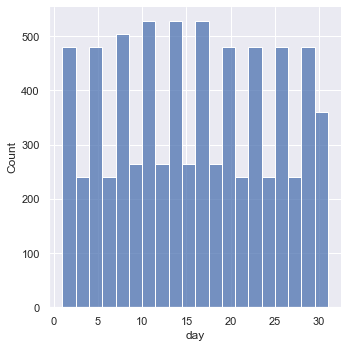

In [16]:
sns.displot(df['day'])

c:\users\barma\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


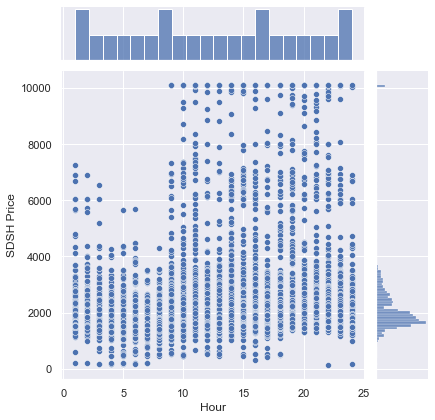

In [17]:
sns.jointplot(df['Hour'],df['SDSH Price'])

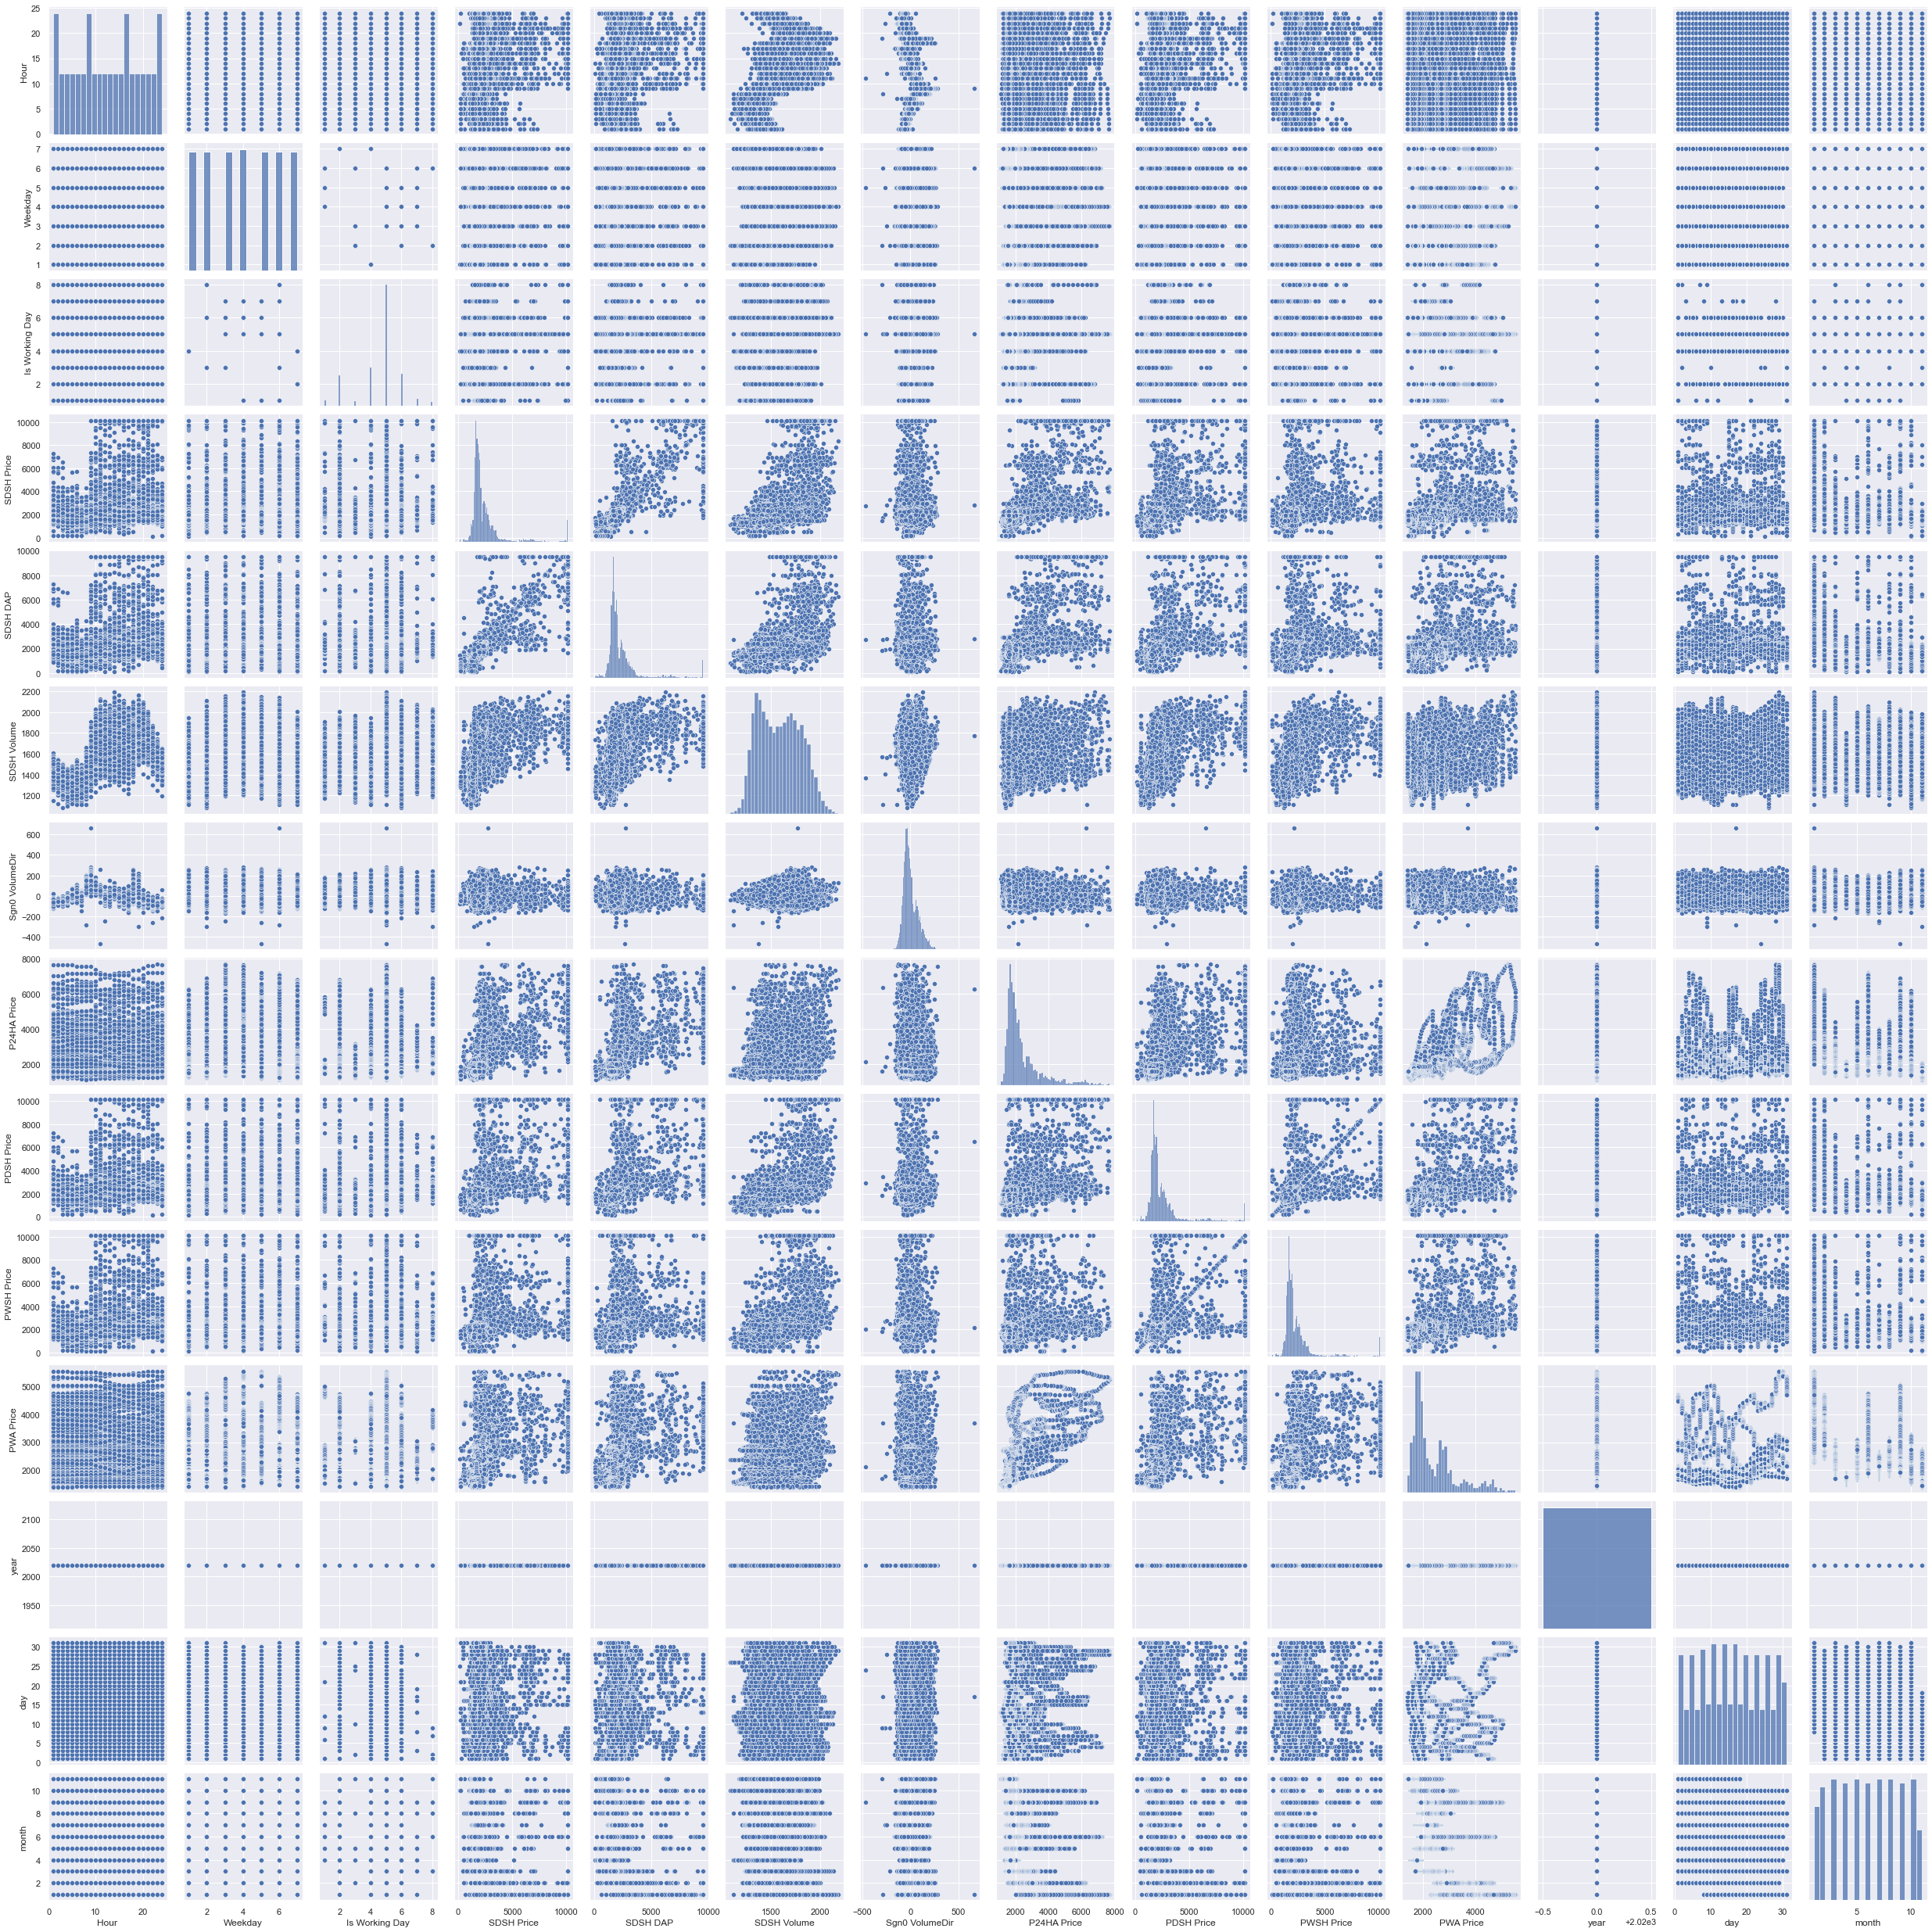

In [18]:
sns.pairplot(df[['Hour','Weekday','Is Working Day','SDSH Price','SDSH DAP','SDSH Volume','Sgn0 VolumeDir','P24HA Price','PDSH Price','PWSH Price','PWA Price','year','day','month']])

c:\users\barma\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='SDSH Volume'>

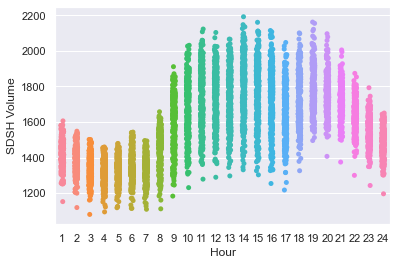

In [19]:
sns.stripplot(df['Hour'],df['SDSH Volume'])

# Question 2

In [20]:
# find the correlation each features

df.corr()

,Hour,Weekday,Is Working Day,SDSH Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,year,month,day
Hour,1.000000e+00,0.000000,5.011445e-18,0.177124,0.192409,0.517051,-0.212302,-0.001876,0.182039,0.179475,-0.000888,NaN,-1.285946e-17,6.928901e-19
Weekday,0.000000e+00,1.000000,-3.896767e-01,0.028230,0.021966,0.098590,0.000328,0.082395,0.042976,0.037496,0.003194,NaN,-1.210897e-02,1.276218e-02
Is Working Day,5.011445e-18,-0.389677,1.000000e+00,0.058574,0.065865,0.153823,0.008668,0.012707,0.051176,0.033583,-0.021212,NaN,8.873910e-04,-4.625321e-02
SDSH Price,1.771244e-01,0.028230,5.857375e-02,1.000000,0.877215,0.455266,0.025239,0.640644,0.545640,0.261182,0.435942,NaN,-2.154884e-01,2.884282e-02
SDSH DAP,1.924093e-01,0.021966,6.586538e-02,0.877215,1.000000,0.449537,0.017135,0.604430,0.521162,0.242012,0.407088,NaN,-2.081050e-01,-9.589960e-03
SDSH Volume,5.170506e-01,0.098590,1.538228e-01,0.455266,0.449537,1.000000,0.171447,0.234202,0.439201,0.378483,0.191661,NaN,-1.116665e-01,2.057675e-02
Sgn0 VolumeDir,-2.123017e-01,0.000328,8.667760e-03,0.025239,0.017135,0.171447,1.000000,-0.007565,0.021994,0.017315,-0.002684,NaN,4.828494e-04,-6.148939e-04
P24HA Price,-1.875810e-03,0.082395,1.270705e-02,0.640644,0.604430,0.234202,-0.007565,1.000000,0.496881,0.191215,0.687520,NaN,-3.088589e-01,7.207945e-02
PDSH Price,1.820387e-01,0.042976,5.117556e-02,0.545640,0.521162,0.439201,0.021994,0.496881,1.000000,0.538969,0.496169,NaN,-2.042949e-01,2.407441e-02
PWSH Price,1.794747e-01,0.037496,3.358272e-02,0.261182,0.242012,0.378483,0.017315,0.191215,0.538969,1.000000,0.434290,NaN,-1.883537e-01,-2.308833e-02


In [21]:
# SDSH Price vs SDSH Volume
df['SDSH Price'].corr(df['SDSH Volume'])

0.4552661450794059

In [22]:
# sns.catplot(y="SDSH Price", x="SDSH Volume", data = df.sort_values("SDSH Price", ascending = False), kind="boxen", height=8, aspect=3)
# plt.show()

In [23]:
# SDSH Price vs SDSH DAP
df['SDSH Price'].corr(df['SDSH DAP'])

0.8772147246990105

In [24]:
# sns.catplot(y="SDSH Price", x="SDSH DAP", data = df.sort_values("SDSH Price", ascending = False), kind="boxen", height=8, aspect=3)
# plt.show()

In [25]:
df['SDSH Price'].corr(df['P24HA Price'])

0.6406443591896162

In [26]:
df['SDSH Price'].corr(df['PDSH Price'])

0.5456400561379298

In [27]:
df['SDSH Price'].corr(df['PWSH Price'])

0.26118238949889994

In [28]:
df['SDSH Price'].corr(df['PWA Price'])

0.4359421739188028

In [29]:
df['SDSH Price'].corr(df['Hour'])

0.17712437672035874

# Question 3(predict electricity price)

In [57]:
# data divided for tarin and test
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)


In [62]:
df=training_data
df_test=testing_data

In [63]:
# Features selection
df_test.shape

(1517, 14)

In [32]:
df.columns

Index(['Hour', 'Weekday', 'Is Working Day', 'SDSH Price', 'SDSH DAP',
       'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price',
       'PWSH Price', 'PWA Price', 'year', 'month', 'day'],
      dtype='object')

In [33]:
X=df.loc[:,['Hour', 'Weekday', 'Is Working Day','SDSH DAP',
       'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price',
       'PWSH Price', 'PWA Price', 'year', 'month', 'day']]

In [34]:
X.head()

,Hour,Weekday,Is Working Day,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,year,month,day
0,1,4,7,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2020,1,8
1,2,4,7,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2020,1,8
2,3,4,7,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2020,1,8
3,4,4,7,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2020,1,8
4,5,4,7,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2020,1,8


In [38]:
y=df.iloc[:,3]
y.head()

0    2475.68
1    2484.40
2    2486.89
3    2533.42
4    2850.75
Name: SDSH Price, dtype: float64

In [39]:
# find important features using Extratreeregressor
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [40]:
print(selection.feature_importances_)

[0.01559117 0.01273061 0.01112508 0.69136056 0.03379266 0.01380466
 0.09906067 0.03401715 0.01777969 0.02572632 0.         0.02510945
 0.01990199]


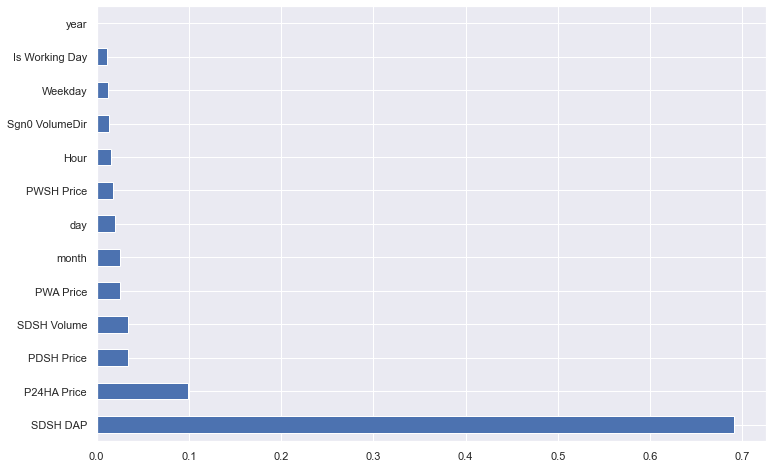

In [41]:
# plot graph of features important
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fit the model using Random Forest

In [67]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred = model.predict(X_test)

In [70]:
model.score(X_train,y_train)

0.9765206508001022

In [71]:
model.score(X_test,y_test)

0.8404786215739168

c:\users\barma\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


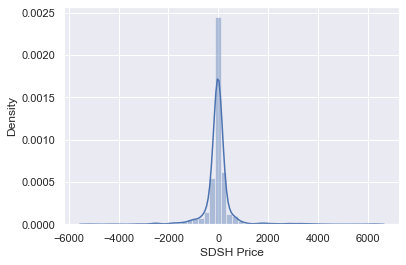

In [46]:
sns.distplot(y_test-y_pred)
plt.show()

In [47]:
from sklearn import metrics

In [75]:
print("Mean absulate error" , metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error" , metrics.mean_squared_error(y_test,y_pred))
print("sqrtMean squared error " , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absulate error 276.4840173391422
Mean squared error 402623.86836396676
sqrtMean squared error  634.5264914595502


# Hyperparameter tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [51]:
#create random gird
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [52]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [53]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
model_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [73]:
prediction = model_random.predict(X_test)

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 268.6249722836106
MSE: 365403.6697108919
RMSE: 604.4862857922352


# save model in joblib

In [76]:
import joblib
joblib.dump(model, "electricity_price_predictor.pkl")

['electricity_price_predictor.pkl']

In [77]:
model_a = joblib.load("electricity_price_predictor.pkl")

In [78]:
model_a.score(X_train,y_train)

0.9765206508001022

In [79]:
model_a.score(X_test,y_test)

0.8404786215739168

# Question 4 (predict electricity load of given day)

In [83]:
df.shape

(6067, 14)

In [84]:
df.columns

Index(['Hour', 'Weekday', 'Is Working Day', 'SDSH Price', 'SDSH DAP',
       'SDSH Volume', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price',
       'PWSH Price', 'PWA Price', 'year', 'month', 'day'],
      dtype='object')

In [85]:
X=df.loc[:,['Hour', 'Weekday', 'Is Working Day', 'SDSH Price', 'SDSH DAP', 'Sgn0 VolumeDir', 'P24HA Price', 'PDSH Price',
       'PWSH Price', 'PWA Price', 'year', 'month', 'day']]

In [87]:
X.head()

,Hour,Weekday,Is Working Day,SDSH Price,SDSH DAP,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,year,month,day
3519,16,3,5,9906.45,6008.07,-90.3,4092.899809,7371.12,3147.08,2668.436706,2020,6,2
558,7,6,5,1461.29,1652.56,-39.4,3115.094583,1454.73,2397.14,5269.568186,2020,1,31
1507,20,3,5,4213.37,3700.09,-69.7,3236.249583,3775.93,3146.52,2696.943155,2020,3,10
1873,2,5,5,1688.09,1679.64,-41.4,1797.472083,1959.81,1656.37,1868.546131,2020,3,26
3380,21,4,5,1794.79,1802.82,28.9,2312.686667,2585.29,2757.07,3044.627881,2020,5,27


In [88]:
y=df.iloc[:,5]
y.head()

3519    1870.1
558     1456.3
1507    2008.7
1873    1383.7
3380    1876.9
Name: SDSH Volume, dtype: float64

In [89]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [90]:
print(selection.feature_importances_)

[0.577911   0.04248197 0.04646126 0.05850189 0.07081502 0.04300029
 0.01544477 0.05213588 0.03147358 0.01739533 0.         0.03257946
 0.01179954]


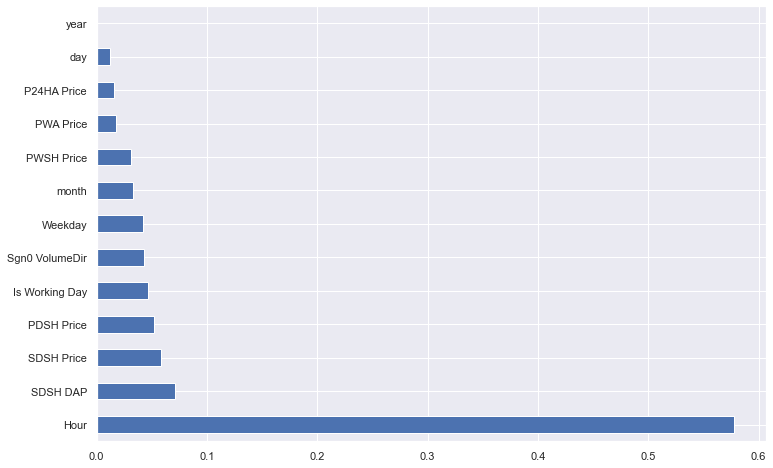

In [91]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [92]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [94]:
y_pred = model.predict(X_test)

In [95]:
model.score(X_train,y_train)

0.9924811665352488

In [96]:
model.score(X_test,y_test)

0.9438926752751882

c:\users\barma\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


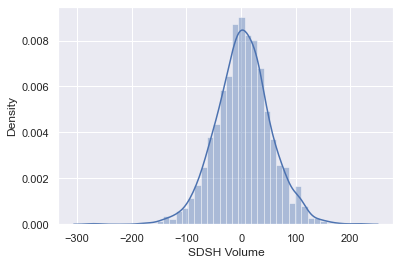

In [97]:
sns.distplot(y_test-y_pred)
plt.show()

In [98]:
print("Mean absulate error" , metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error" , metrics.mean_squared_error(y_test,y_pred))
print("sqrtMean squared error " , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absulate error 39.21810708401976
Mean squared error 2598.9643904744635
sqrtMean squared error  50.980039137631735


In [99]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [100]:
#create random gird
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [101]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [102]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [103]:
model_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [104]:
prediction = model_random.predict(X_test)

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 41.52504894063278
MSE: 2873.5064187674084
RMSE: 53.605096947654225


In [106]:
joblib.dump(model, "electricity_load_predictor.pkl")

['electricity_load_predictor.pkl']